In [1]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
train_x, train_y = [], []
test_x, test_y = [], []

for i in range(4):
    with open(f'./snowFallData/dataSet_N_{i}.csv', newline='') as f:
        data = list(csv.reader(f))
        train_x.append([x[:-1] for x in data[1:]  if x[-1]!=-1])
        train_y.append([x[-1] for x in data[1:] if x[-1]!=-1])

for i in range(4):
    with open(f'./snowFallData/valSet_N_{i}.csv', newline='') as f:
        data = list(csv.reader(f))
        test_x.append([x[:-1] for x in data[1:]  if x[-1]!=-1])
        test_y.append([x[-1] for x in data[1:] if x[-1]!=-1])

In [3]:
def k_fold_cross(model, k, x_train, y_train):
    error=[]
    for i in range(k):
        low_index=int(i*len(x_train)/k)
        high_index=int((i+1)*len(x_train)/k)
        temp=model.fit(x_train[:low_index]+x_train[high_index:], y_train[:low_index]+y_train[high_index:])
        error.append( 1-temp.score(x_train[low_index:high_index], y_train[low_index:high_index])) 
    return sum(error)/len(error) 
    

38.79051934471941 38.05245730219589 38.354827466016026 38.80794701986755
39.05542000697107 37.923492506099684 38.49337748344371 38.41059602649007
39.18525618682468 37.528755663994424 38.494248867201115 38.01324503311258
39.57999302892994 37.39543394911119 38.36092715231788 38.14569536423841


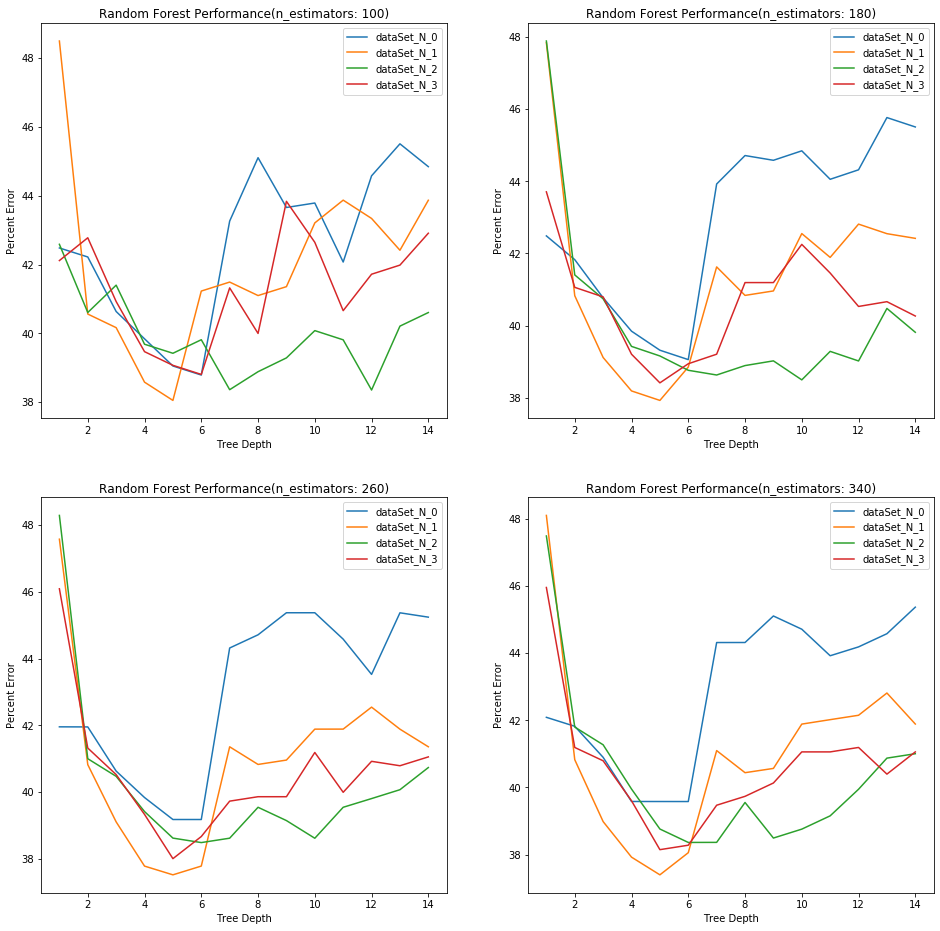

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))

def plot_ax(ax, n_estimators, score_0, score_1, score_2, score_3, x_axis):
    ax.plot(x_axis, score_0, label='dataSet_N_0')
    ax.plot(x_axis, score_1, label='dataSet_N_1')
    ax.plot(x_axis, score_2, label='dataSet_N_2')
    ax.plot(x_axis, score_3, label='dataSet_N_3')

    ax.set_xlabel('Tree Depth')
    ax.set_ylabel('Percent Error')
    ax.set_title(f'Random Forest Performance(n_estimators: {n_estimators})')
    ax.legend()

def run_classifier(ax, n_estimators=100, min_depth=1, max_depth=10):
    score_0, score_1, score_2, score_3, x_axis=[], [], [], [], []
    for i in range(min_depth, max_depth + 1):
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=i, random_state=0)
        score_0.append(k_fold_cross(clf, 5, train_x[0], train_y[0])*100)
        score_1.append(k_fold_cross(clf, 5, train_x[1], train_y[1])*100)
        score_2.append(k_fold_cross(clf, 5, train_x[2], train_y[2])*100)
        score_3.append(k_fold_cross(clf, 5, train_x[3], train_y[3])*100)
    
        x_axis.append(i)
    
    print(f'{min(score_0)} {min(score_1)} {min(score_2)} {min(score_3)}')
    plot_ax(ax, n_estimators, score_0, score_1, score_2, score_3, x_axis)

sizes = [100, 180, 260, 340]
axes = [ax1, ax2, ax3, ax4]

for i, size in enumerate(sizes):
    run_classifier(axes[i], size, max_depth=14)
    
plt.show()  

In [27]:
def score_model(model, x, y, val_x, val_y, plus_one=True, minus_one=False):
    model.fit(x, y)
    score = model.score(val_x, val_y)
    results = model.predict(val_x)
    error = 0
    for i, j in zip(results, val_y):
        i, j = int(i), int(j)
        if plus_one and i + 1 == j:
            error += 1
        elif minus_one and i - 1 == j:
            error += 1
    adjusted_score = 1 - error / len(results)
    return score, adjusted_score

In [28]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0),
    RandomForestClassifier(n_estimators=340, max_depth=5, random_state=0),
    RandomForestClassifier(n_estimators=340, max_depth=6, random_state=0),
    RandomForestClassifier(n_estimators=260, max_depth=5, random_state=0),
]
for i, model in enumerate(models):
    print(score_model(model, train_x[i], train_y[i], test_x[i], test_y[i]))


(0.625, 0.775)
(0.625, 0.8)
(0.65, 0.775)
(0.7, 0.875)
